Importing the libraries

In [134]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [135]:
# import the CSV file as a data frame
df = pd.read_csv('StudentsPerformance.csv')

Displays the first 5 data set

In [136]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Display no of rows and columns

In [137]:

df.shape


(1000, 8)

In [138]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Data Exploration

Check for Missing Values

In [139]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      gender  race/ethnicity  parental level of education  lunch  \
0     False           False                        False  False   
1     False           False                        False  False   
2     False           False                        False  False   
3     False           False                        False  False   
4     False           False                        False  False   
..      ...             ...                          ...    ...   
995   False           False                        False  False   
996   False           False                        False  False   
997   False           False                        False  False   
998   False           False                        False  False   
999   False           False                        False  False   

     test preparation course  math score  reading score  writing score  
0                      False       False          False     

Check for Duplicate values

In [140]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool>

View the data info such as data types

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


check for number of unique values

In [142]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Statistics of the dataset

In [143]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


More Observations of the data set

In [144]:
df['gender'].unique

<bound method Series.unique of 0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object>

In [145]:
df['race_ethnicity'].unique

<bound method Series.unique of 0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: race/ethnicity, Length: 1000, dtype: object>

In [146]:
df['test_preparation_course'].unique

<bound method Series.unique of 0           none
1      completed
2           none
3           none
4           none
         ...    
995    completed
996         none
997    completed
998    completed
999         none
Name: test preparation course, Length: 1000, dtype: object>

Adding new columns total_score and average to the numerical feature

In [147]:
df['total_score']= df['math_score']+df['reading_score']+df['writing_score']

df['average marks']=df['total_score']/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


defining numerical and categorical features

In [148]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!= 'o']

categorical_features = [feature for feature in df.columns if df[feature].dtype!= 'o']

print("we have {} numerical feature : {}". format(len(numerical_features),numerical_features))
print("we have {} categorical feature : {}". format(len(categorical_features),categorical_features))

we have 10 numerical feature : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'total_score', 'average marks']
we have 10 categorical feature : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'total_score', 'average marks']


checking the maximum score of students

In [149]:
math_max = df[df['math_score'] == 100]['average_marks'].count()
print('number of students with full marks maximum of 100 in maths: {math_max}')

number of students with full marks maximum of 100 in maths: {math_max}


In [150]:
reading_max = df[df['reading_score'] == 100]['average_marks'].count()
print('number of students with full marks in reading: {reading_max}')

number of students with full marks in reading: {reading_max}


In [151]:
writing_max = df[df['writing_score'] == 100]['average_marks'].count()
print('number of students with full marks in writing: {writing_max}')

number of students with full marks in writing: {writing_max}


students who have scored less 

In [152]:
math_min = df[df['math_score']<= 20]['average_marks'].count()
print('number of students with minimum marks less than 20 in maths: {math_min}')

number of students with minimum marks less than 20 in maths: {math_min}


Visualizations of the observations

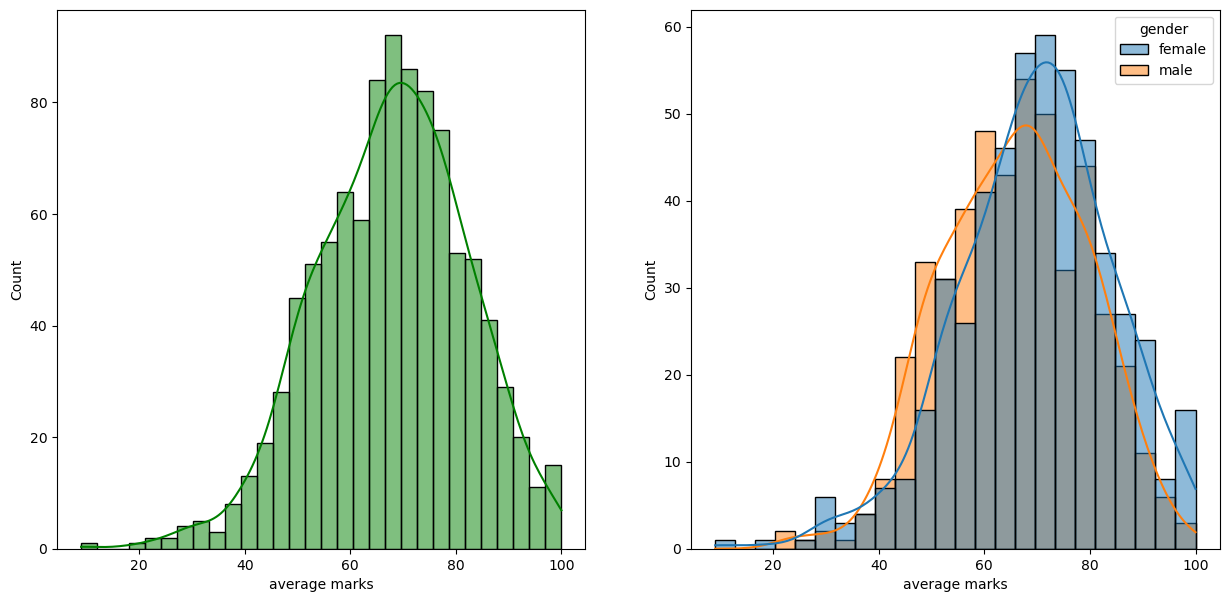

In [153]:
fig,axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average_marks', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'average_marks', kde = True, hue = 'gender')
plt.show()

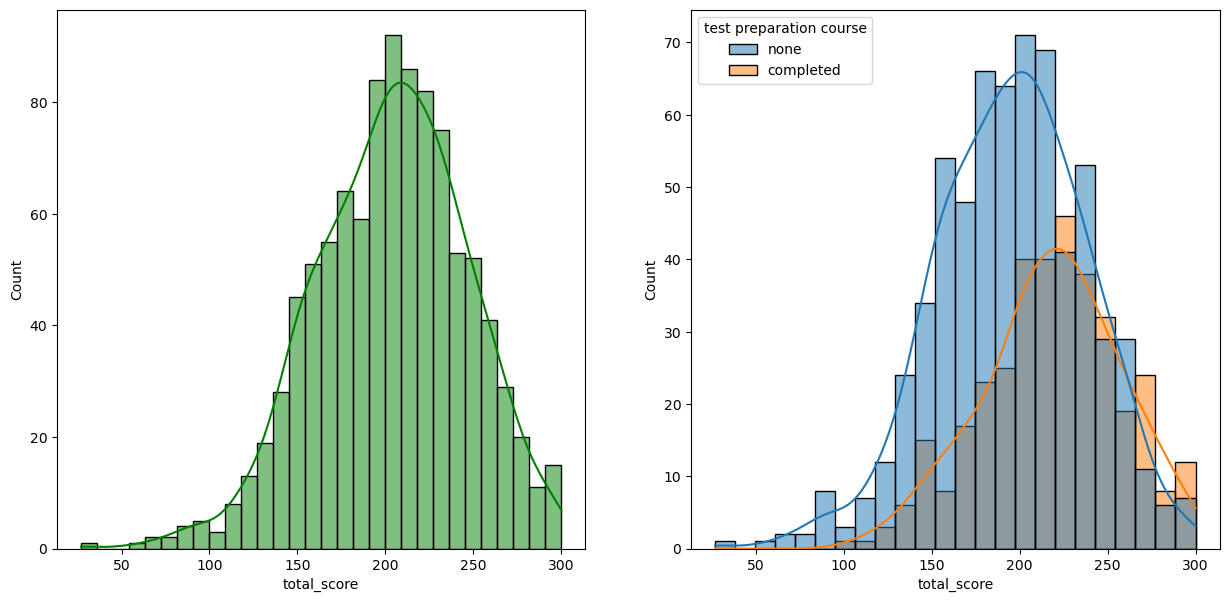

In [158]:
fig,axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'total_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'total_score', kde = True, hue = 'test_preparation_course')
plt.show()